# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [138]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#print(api_key)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [139]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [140]:
# Set up OpenWeather API Call for 1 City
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
#query_url

In [141]:
# Create a copy of the city list that will get eaten by the while loop requests
myCities = cities[0 : len(cities)]
if 'st. louis' not in myCities :
    print(f"Adding your favorite city to the list")
    myCities.append("st. louis")
    
print(len(myCities))

Adding your favorite city to the list
601


In [142]:
# Initialize results lists: City Cloudiness Country Date Humidity Lat Lng Max Temp Wind Speed
mycities_list=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lon=[]
maxtemp=[]
windspeed=[]
i = 0
count = 0

# iterate through the cities list
# if city is able to be processed pop it off the list
# documentation for openweather free api says it only allows 60 calls per minute.
# expecting to get some sort of response and exeption 

print(f"Beginning Request and Retrieval of city weather data")
while len(myCities) > 0: 

    city = myCities[-1]
    i += 1
    print(f"[{i}] Processing weather data for city: {city}")
    res = requests.get(query_url + city)
    resStatus = res.status_code
    response = res.json()

    try :

        if (resStatus == 200) :
            mycities_list.append(city)
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            maxtemp.append(response['main']['temp_max'])
            windspeed.append(response['wind']['speed'])
            count += 1
            myCities.pop(-1)

        elif (resStatus == 404) :
            print(f"City not found. Skipping city: {city}")
            myCities.pop(-1)

        elif (resStatus == 429) :
            print(f"Exceed limit of 60 API calls/minute. Waiting 20 seconds and trying again...")
            time.sleep(20)
        
    except KeyError as err:
        # Never got the wait message.  
        # Once I saw the wait message, would make this code more robust instead of endlessly loopiing
        print(f"Unexepected response received: {response['message']}. Skipping city: {city}")
        myCities.pop(-1)
        
print(f"\nNumber of cities processed: {count}")


Beginning Request and Retrieval of city weather data
[1] Processing weather data for city: st. louis
[2] Processing weather data for city: ancud
[3] Processing weather data for city: monrovia
[4] Processing weather data for city: vyartsilya
[5] Processing weather data for city: wajima
[6] Processing weather data for city: peniche
[7] Processing weather data for city: kawalu
[8] Processing weather data for city: omsukchan
[9] Processing weather data for city: carauari
[10] Processing weather data for city: tabas
[11] Processing weather data for city: ngunguru
[12] Processing weather data for city: wanganui
[13] Processing weather data for city: kommunisticheskiy
[14] Processing weather data for city: pemangkat
City not found. Skipping city: pemangkat
[15] Processing weather data for city: tubuala
[16] Processing weather data for city: banyo
[17] Processing weather data for city: marawi
[18] Processing weather data for city: port lincoln
[19] Processing weather data for city: oranjemund


[159] Processing weather data for city: ixtapa
[160] Processing weather data for city: palmer
[161] Processing weather data for city: ewa beach
[162] Processing weather data for city: ilovlya
[163] Processing weather data for city: cidreira
[164] Processing weather data for city: rio gallegos
[165] Processing weather data for city: namtsy
[166] Processing weather data for city: puerto del rosario
[167] Processing weather data for city: kwinana
[168] Processing weather data for city: lac du bonnet
[169] Processing weather data for city: kindu
[170] Processing weather data for city: cheremisinovo
[171] Processing weather data for city: northam
[172] Processing weather data for city: totskoye
[173] Processing weather data for city: waipawa
[174] Processing weather data for city: sulangan
[175] Processing weather data for city: kushima
[176] Processing weather data for city: katy
[177] Processing weather data for city: oussouye
[178] Processing weather data for city: zhigansk
[179] Process

[306] Processing weather data for city: igarka
[307] Processing weather data for city: sanchor
[308] Processing weather data for city: luderitz
[309] Processing weather data for city: teya
[310] Processing weather data for city: tura
[311] Processing weather data for city: valentin gomez farias
[312] Processing weather data for city: pisco
[313] Processing weather data for city: gadsden
[314] Processing weather data for city: ribeira grande
[315] Processing weather data for city: jahrom
City not found. Skipping city: jahrom
[316] Processing weather data for city: barcelos
[317] Processing weather data for city: ust-koksa
[318] Processing weather data for city: ulaangom
[319] Processing weather data for city: shibarghan
City not found. Skipping city: shibarghan
[320] Processing weather data for city: salalah
[321] Processing weather data for city: darnah
[322] Processing weather data for city: trinidad
[323] Processing weather data for city: chiriqui grande
[324] Processing weather data

[459] Processing weather data for city: kodiak
[460] Processing weather data for city: van
[461] Processing weather data for city: dingle
[462] Processing weather data for city: bardiyah
City not found. Skipping city: bardiyah
[463] Processing weather data for city: vardo
[464] Processing weather data for city: carson city
[465] Processing weather data for city: mastic beach
[466] Processing weather data for city: kidal
[467] Processing weather data for city: kahului
[468] Processing weather data for city: putnok
[469] Processing weather data for city: abu dhabi
[470] Processing weather data for city: atuona
[471] Processing weather data for city: korla
City not found. Skipping city: korla
[472] Processing weather data for city: tasiilaq
[473] Processing weather data for city: paamiut
[474] Processing weather data for city: hithadhoo
[475] Processing weather data for city: jiayuguan
[476] Processing weather data for city: grand river south east
City not found. Skipping city: grand rive

In [143]:
# 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [144]:
colnames = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed']
data = list(zip(mycities_list, cloudiness, country, date, humidity, lat, lon, maxtemp, windspeed))


In [145]:
cityWeather_df = pd.DataFrame(data, columns=colnames)
cityWeather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,st. louis,1,US,1574224357,100,38.63,-90.20,44.01,4.70
1,ancud,20,CL,1574224564,93,-41.87,-73.83,42.80,2.24
2,monrovia,85,LR,1574224565,84,6.33,-10.80,78.31,0.83
3,vyartsilya,89,RU,1574224565,85,62.18,30.69,37.11,10.87
4,wajima,75,JP,1574224566,70,37.40,136.90,42.80,2.24
...,...,...,...,...,...,...,...,...,...
523,coromandel,100,BR,1574224701,96,-18.47,-47.20,63.97,3.87
524,cape town,0,ZA,1574224684,62,-33.93,18.42,62.01,19.46
525,rikitea,100,PF,1574224701,86,-23.12,-134.97,76.15,9.91
526,hilo,75,US,1574224701,78,19.71,-155.08,78.80,0.38


In [146]:
#export daata to csv
export_csv = cityWeather_df.to_csv(output_data_file, index = None, header=True)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [147]:
# Get Date of the data to build titles
#https://docs.python.org/3/library/datetime.html#datetime-objects
# https://stackoverflow.com/questions/9744775/how-to-convert-integer-timestamp-to-python-datetime
# https://stackoverflow.com/questions/52733516/python-3-7-0-how-do-i-format-datetime-to-mm-dd-yy-hhmmss
# ttps://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

datestamp = cityWeather_df.loc[0]['Date']
myDatetime = datetime.datetime.fromtimestamp(datestamp)
dateStr = myDatetime.strftime('%Y/%m/%d %H:%M:%S')
dateStr


'2019/11/19 22:32:37'

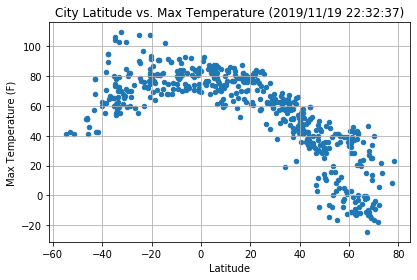

In [148]:
title = f"City Latitude vs. Max Temperature ({dateStr})"
ax = cityWeather_df.plot(kind="scatter", x="Lat", y="Max Temp", title=title, grid=True)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")

plt.tight_layout()
plt.show()


#  Observation 1 - Latitude vs Temperature 

* It is hotter in the southern hemisphere and near the equator than it is in northern hemisphere. 
* The further north you go the colder it is. 


#### Latitude vs. Humidity Plot

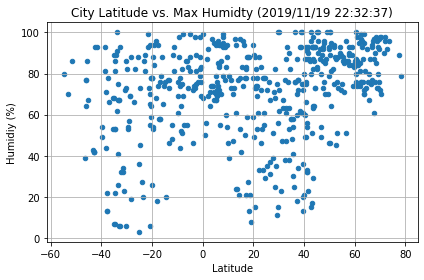

In [149]:
title = f"City Latitude vs. Max Humidty ({dateStr})"
ax = cityWeather_df.plot(kind="scatter", x="Lat", y="Humidity", title=title, grid=True)
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidiy (%)")

plt.tight_layout()
plt.show()

# Observation 2 - Latitude vs Humidty

* Humidty un between latitudes -15 and +15 (near the equator) has high floor (40%).  It is humid near the eaquator.
* Humidty above latitud +45 and below latitude -45 is high also


#### Latitude vs. Cloudiness Plot

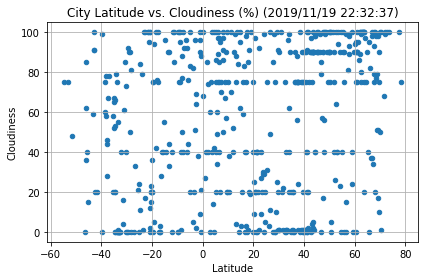

In [150]:
title = f"City Latitude vs. Cloudiness (%) ({dateStr})"
ax = cityWeather_df.plot(kind="scatter", x="Lat", y="Cloudiness", title=title, grid=True)
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness")

plt.tight_layout()
plt.show()

# Observation 3 -  Latitude vs. Cloudiness

* The scatter plot approaches horizontal levels of cloudiness across ranges if latitude.
* Maybe these levels of cloudiness reflect frontal boundaries?   Futher investgation required.

#### Latitude vs. Wind Speed Plot

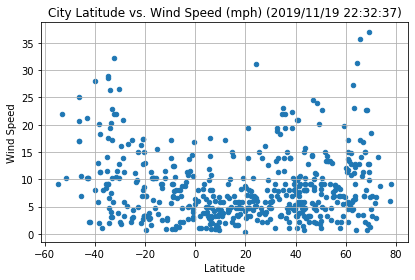

In [151]:
title = f"City Latitude vs. Wind Speed (mph) ({dateStr})"
ax = cityWeather_df.plot(kind="scatter", x="Lat", y="Wind Speed", title=title, grid=True)
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed")

plt.tight_layout()
plt.show()

# Observation 4 -  Wind Speeds

* Wind speeds trend higher above +60 latitude and below -30 latitude.